![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

## Overview
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Business Goal
We aim to segement the Customers based on RFM so that the company can target its customers efficiently.

## Features Details

__InvoiceNo:__ Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

__StockCode:__ Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

__Description:__ Product (item) name. Nominal.

__Quantity:__ The quantities of each product (item) per transaction. Numeric.	

__InvoiceDate:__ Invice Date and time. Numeric, the day and time when each transaction was generated.

__UnitPrice:__ Unit price. Numeric, Product price per unit in sterling.

__CustomerID:__ Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

__Country:__ Country name. Nominal, the name of the country where each customer resides. 




#### The steps are broadly divided into:

1. [Step 1 : Business Understanding and Data collection](#1)
2. [Step 2 : Data Cleansing and Preprocessing](#2)
3. [Step 3 : Exploratory Data Analysis (EDA) And Checking for Outliers](#3)
4. [Step 4 : Feature Engineering and RFM Analysis](#4)
5. [Step 5 : Data Transformation and Correlation Between Features](#5)
6. [Step 6 : Model Building](#6)
7. [Step 7 : Visualize Customer Segementtion](#7)
8. [Step 8 : Final Analysis](#8)
9. [Step 9 : Save our Final Analysis dataframe as a csv file](#9)



<a id="1"></a> <br>
# Step 1 : Business Understanding and Data collection
<br>

In [1]:
# import required libraries for dataframe and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

# current version of seaborn generates a bunch of warnings that we'll ignore
import warnings
warnings.filterwarnings('ignore')

# import required libraries for clustering
from scipy.stats import gaussian_kde,chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

sns.set_style('whitegrid')
color = sns.color_palette()

### Reading the Data on which Analysis needs to be done

In [2]:
df = pd.read_excel('/home/umair-pc/Downloads/online+retail/Online Retail.xlsx')

### Shape of Dataset

In [3]:
df.shape

(541909, 8)

### First five rows of Dataset

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Summary Statistics of data

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
df.describe(include="object")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


<a id="2"></a> <br>
# Step 2 : Data Cleansing and Preprocessing
<br>

### Information of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Check for null values

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Drop rows where Customer Id is Null because they can't help.

In [9]:
df.dropna(subset = ['CustomerID'], inplace=True)

In [10]:
# Checking for null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Change Description - UPPER case to LOWER case

In [11]:
df['Description'] = df.Description.str.lower()

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### It is Given Invoice number starts with letter C are Cancellation.

In [13]:
df[df.InvoiceNo.str[0]=="C"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [14]:
# Counting the rows of Cancellation
len(df[df.InvoiceNo.str[0]=="C"])

8905

### Hence we have to remove these rows from dataset

In [15]:
df = df[df.InvoiceNo.str[0]!="C"]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


### Calculate Unique Number of Customers

In [17]:
len(df.CustomerID.unique())

4339

In [18]:
# change columns type - float to Int type 
df['CustomerID'] = df['CustomerID'].astype('int64')

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [20]:
len(df.CustomerID.unique())

4339

#### Here we see that when we change CustomerId type from floatt to int then there is no customerID loss. This is done for Making reading easy of CustomerID

### Checking Quantity column with negative values

In [21]:
len(df[df.Quantity <= 0])

0

### Checking UnitPrice column with negative values

In [22]:
len(df[df.UnitPrice <0])

0

Hence, We see that there is no row of Quantity and Unitprice having value negative. so we don't have to remove them 


### Add the column - AmountSpent in the dataset by the help of Quantity and UnitPrice column

In [23]:
df['AmountSpent'] = df['Quantity'] * df['UnitPrice']

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


<a id="3"></a> <br>
# Step 3 : Exploratory Data Analysis (EDA) And Checking for Outliers
<br>

### Rearrange all the columns for easy reference

In [25]:
df = df[['CustomerID','InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','AmountSpent','Country']]

In [26]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country
0,17850,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom


### Add the columns - Month, Day and Hour for the invoice

In [27]:
df.insert(loc=3, column='YearMonth', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='Hour', value=df.InvoiceDate.dt.hour)

In [28]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,YearMonth,Day,Hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country
0,17850,536365,2010-12-01 08:26:00,201012,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom
1,17850,536365,2010-12-01 08:26:00,201012,3,8,71053,white metal lantern,6,3.39,20.34,United Kingdom
2,17850,536365,2010-12-01 08:26:00,201012,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom
3,17850,536365,2010-12-01 08:26:00,201012,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom
4,17850,536365,2010-12-01 08:26:00,201012,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom


### How Many Orders Made By The Customers?

In [29]:
df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


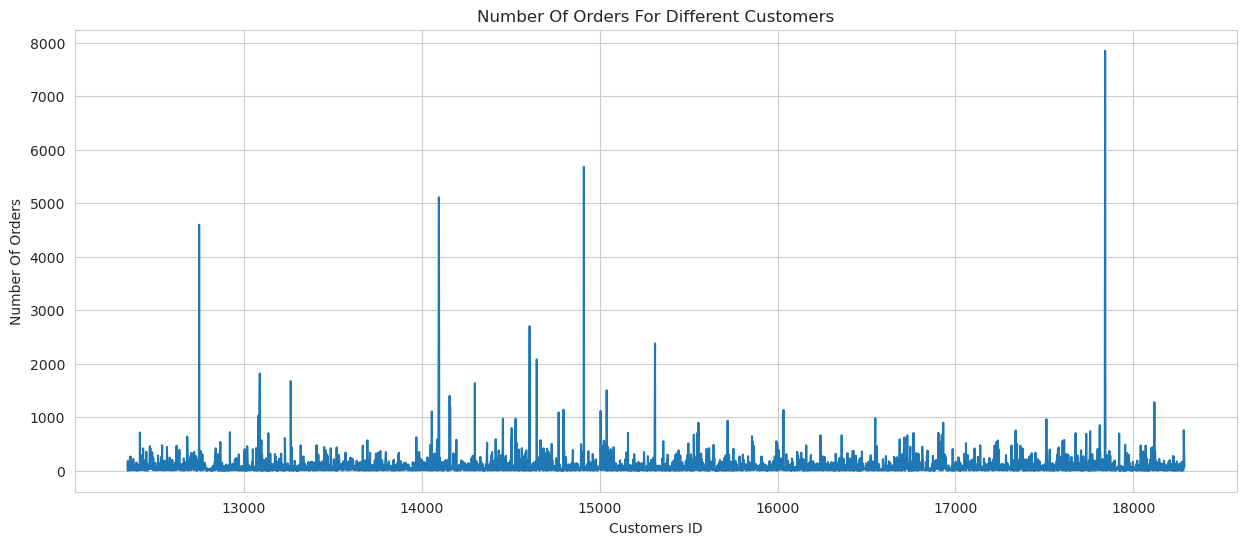

In [30]:
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID.to_numpy(), orders.InvoiceNo.to_numpy())
plt.xlabel('Customers ID')
plt.ylabel('Number Of Orders')
plt.title('Number Of Orders For Different Customers')
plt.show()

## The TOP 5 Customers With Most Number Of Orders

In [31]:
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


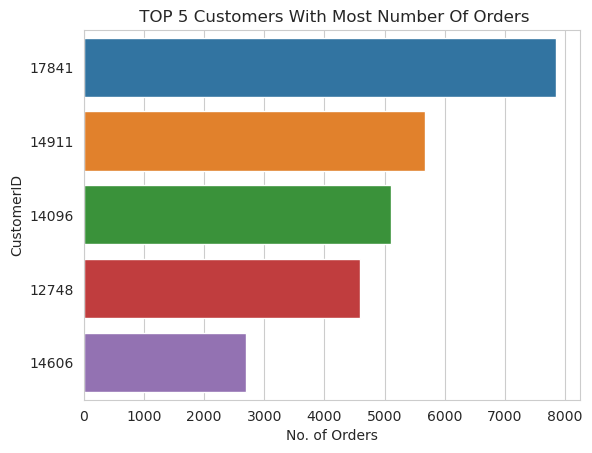

In [32]:
a= orders.sort_values(by='InvoiceNo', ascending=False).head()
sns.barplot(y = a['CustomerID'].astype(str),x = a['InvoiceNo'])
plt.xlabel('No. of Orders')
plt.title(' TOP 5 Customers With Most Number Of Orders')
plt.show()

## How Much Money Spent By The Customers?

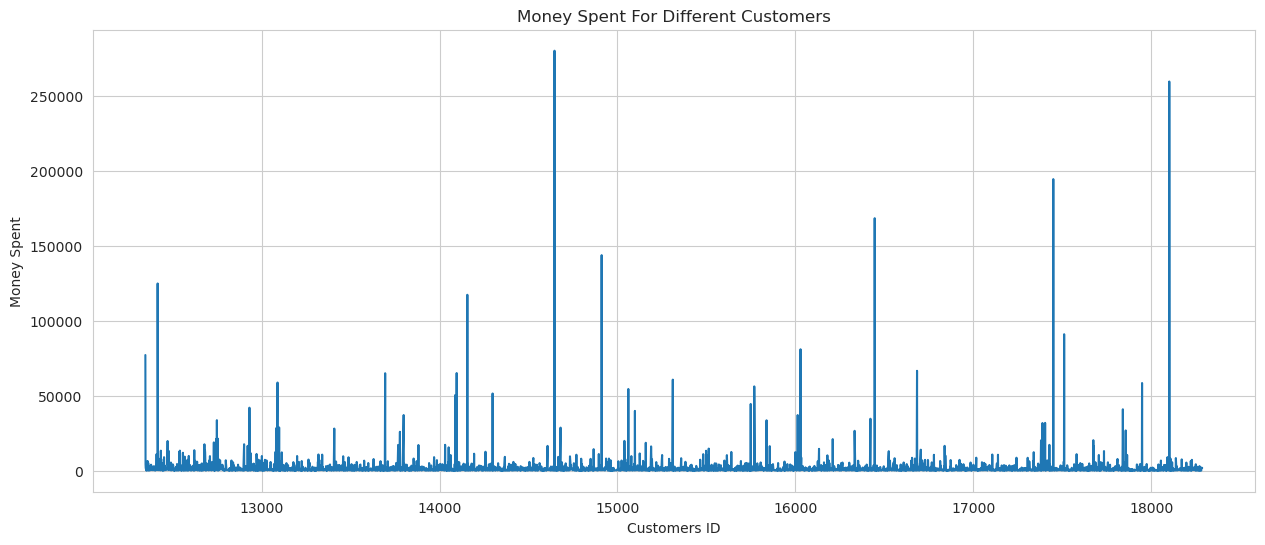

In [33]:
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID.to_numpy(), money_spent.AmountSpent.to_numpy())
plt.xlabel('Customers ID')
plt.ylabel('Money Spent')
plt.title('Money Spent For Different Customers')
plt.show()

## The TOP 5 Customers With Highest Money Spent

In [34]:
money_spent.sort_values(by='AmountSpent', ascending=False).head()

,CustomerID,Country,AmountSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


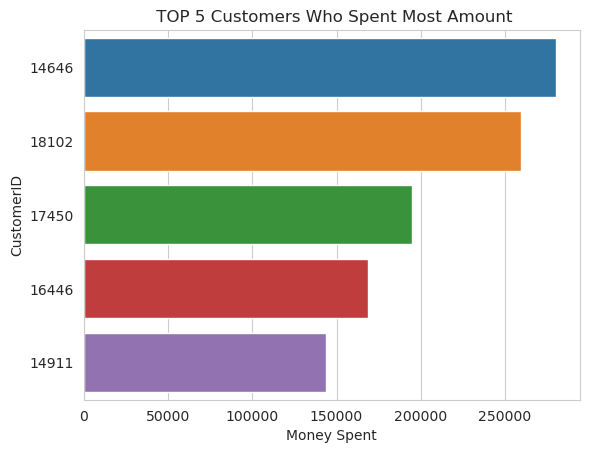

In [35]:
a= money_spent.sort_values(by='AmountSpent', ascending=False).head()
sns.barplot(y = a['CustomerID'].astype(str),x = a['AmountSpent'])
plt.xlabel('Money Spent')
plt.title(' TOP 5 Customers Who Spent Most Amount')
plt.show()

## How Many Orders (Per Month)?

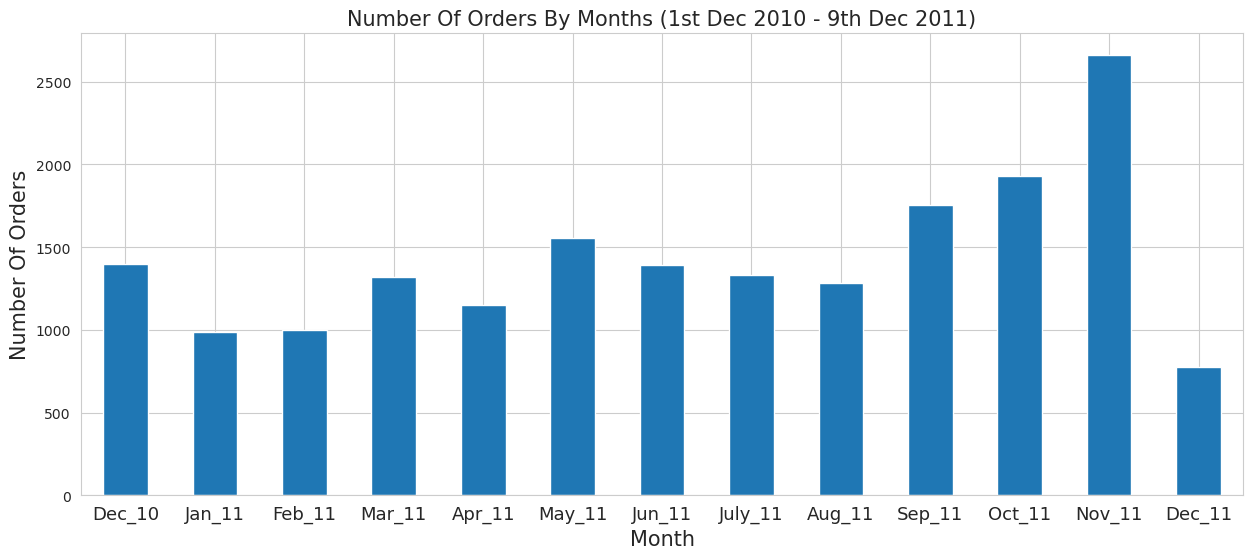

In [36]:
ax = df.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number Of Orders', fontsize=15)
ax.set_title('Number Of Orders By Months (1st Dec 2010 - 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'Jun_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11', 'Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

We observe Maximum number of Orders were placed November 2011 and least in December 2011 (December data might be incomplete)


## How Many Orders (Per Day)?

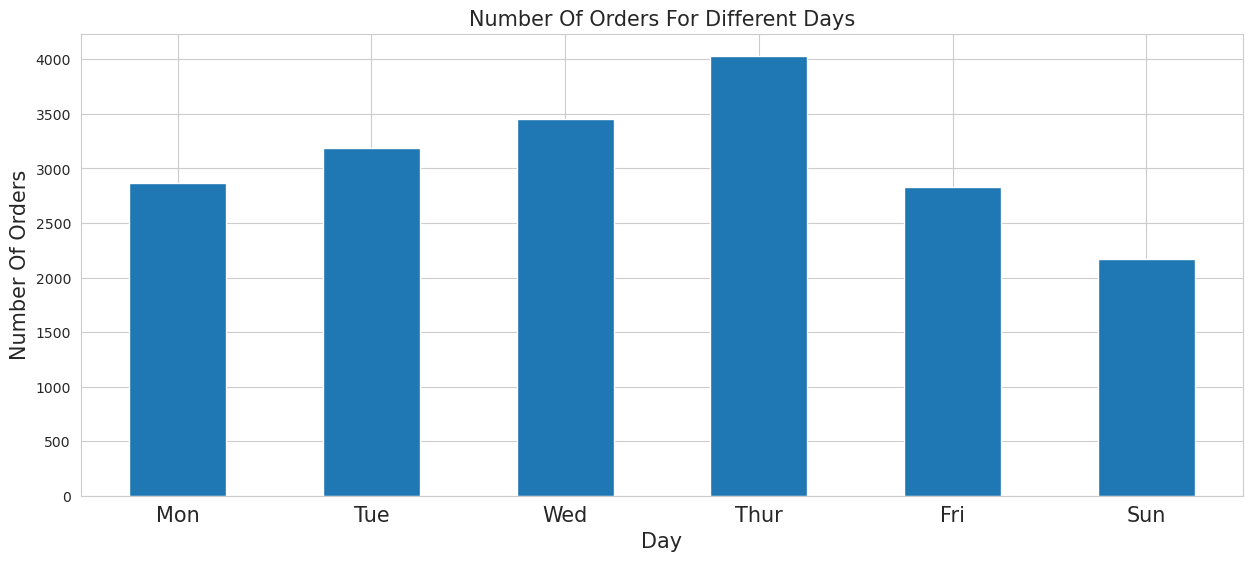

In [37]:

ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number Of Orders', fontsize=15)
ax.set_title('Number Of Orders For Different Days', fontsize=15)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sun'), rotation='horizontal', fontsize=15)
plt.show()

Most orders were placed on thursday and least on friday

## How Many Orders (Per Hour)?

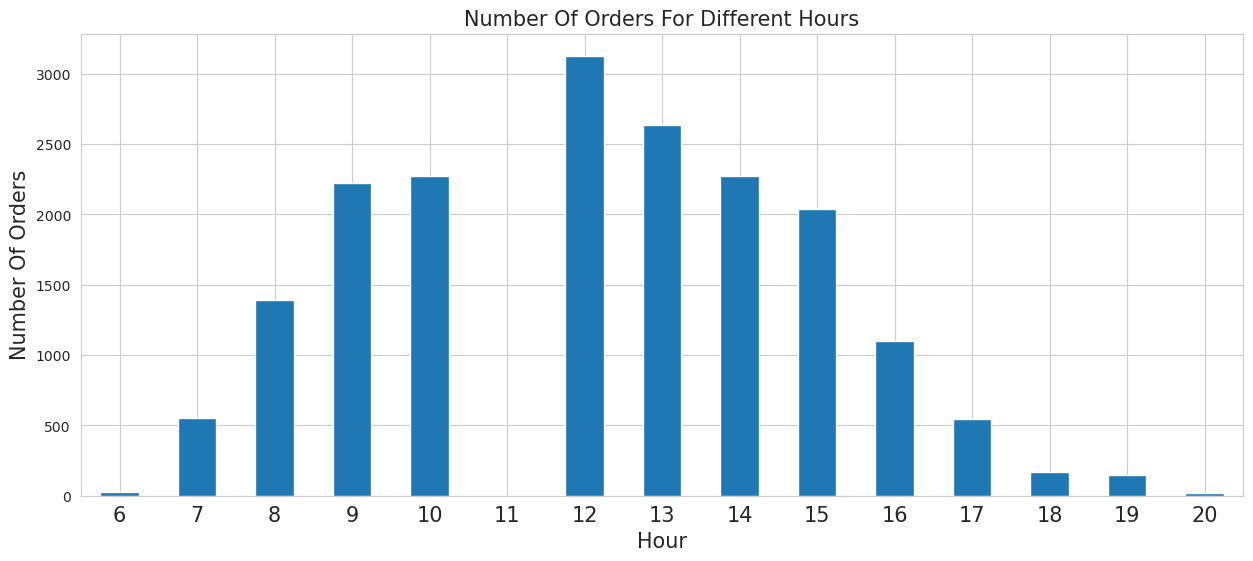

In [38]:
unique_hours = df.groupby('InvoiceNo')['Hour'].apply(lambda x: list(set(x)))
counts = unique_hours.value_counts().iloc[:-1].sort_index()

ax = counts.plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Number Of Orders', fontsize=15)
ax.set_title('Number Of Orders For Different Hours', fontsize=15)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)

plt.show()

We observe Maximum number of Orders were placed at 12 clock and least at 20 clock 

## Countries With Most Number Of Orders

In [39]:
top_country = df.groupby(by=['Country'], as_index=False)['InvoiceNo'].count()
top_country = top_country.sort_values(by='InvoiceNo', ascending=False).head(10)
top_country.head()

,Country,InvoiceNo
35,United Kingdom,354345
14,Germany,9042
13,France,8342
10,EIRE,7238
30,Spain,2485


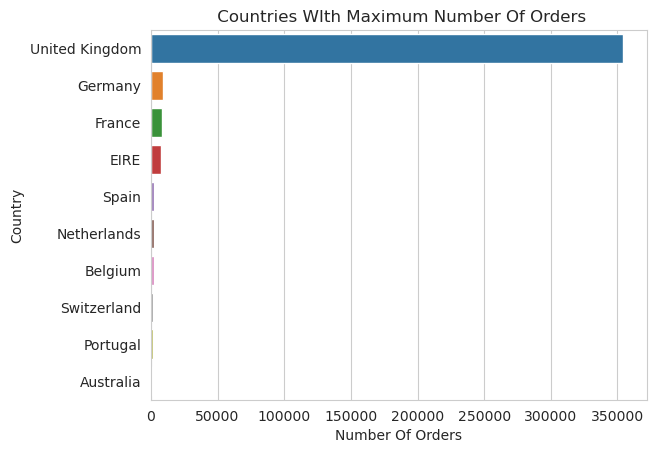

In [40]:
sns.barplot(y = top_country['Country'],x = top_country['InvoiceNo'])
plt.xlabel('Number Of Orders')
plt.title(' Countries WIth Maximum Number Of Orders')
plt.show()

## Countries With Most Money Spent

In [41]:
top_country2 = df.groupby(by=['Country'], as_index=False)['AmountSpent'].sum()
top_country2 = top_country2.sort_values(by='AmountSpent', ascending=False).head(10)
top_country2.head()

,Country,AmountSpent
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050


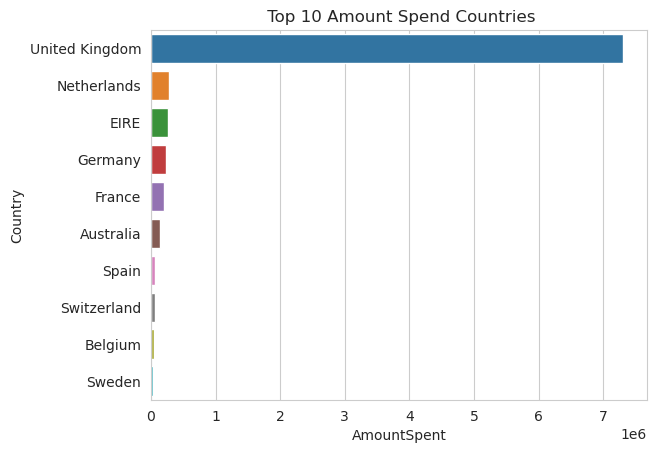

In [42]:
sns.barplot(y = top_country2['Country'],x = top_country2['AmountSpent'])
plt.xlabel('AmountSpent')
plt.title(' Top 10 Amount Spend Countries')
plt.show()

## Most Selling Products By Description

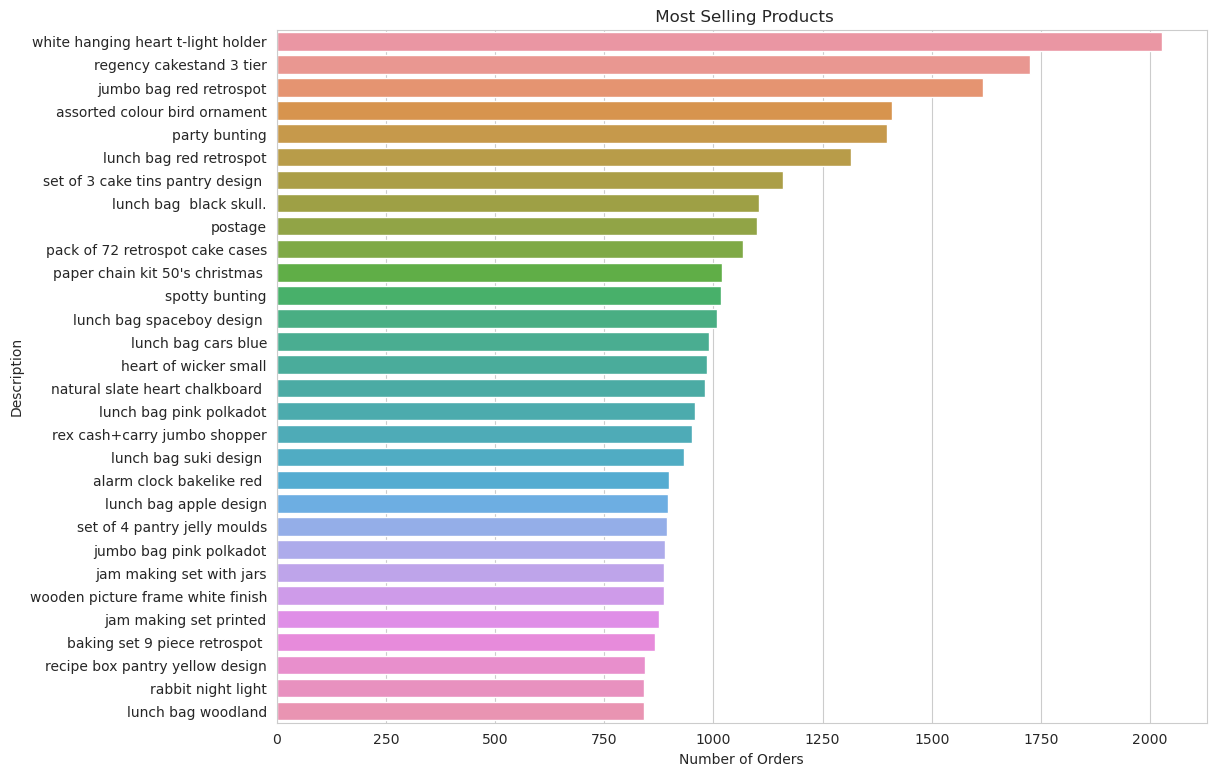

In [43]:
product = df.groupby('Description').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(30)
plt.figure(figsize=(12, 9))
sns.barplot(y = product['Description'],x = product['Count'])
plt.xlabel('Number of Orders')
plt.title(' Most Selling Products')
plt.show()

## Most Selling Products By Stock Code

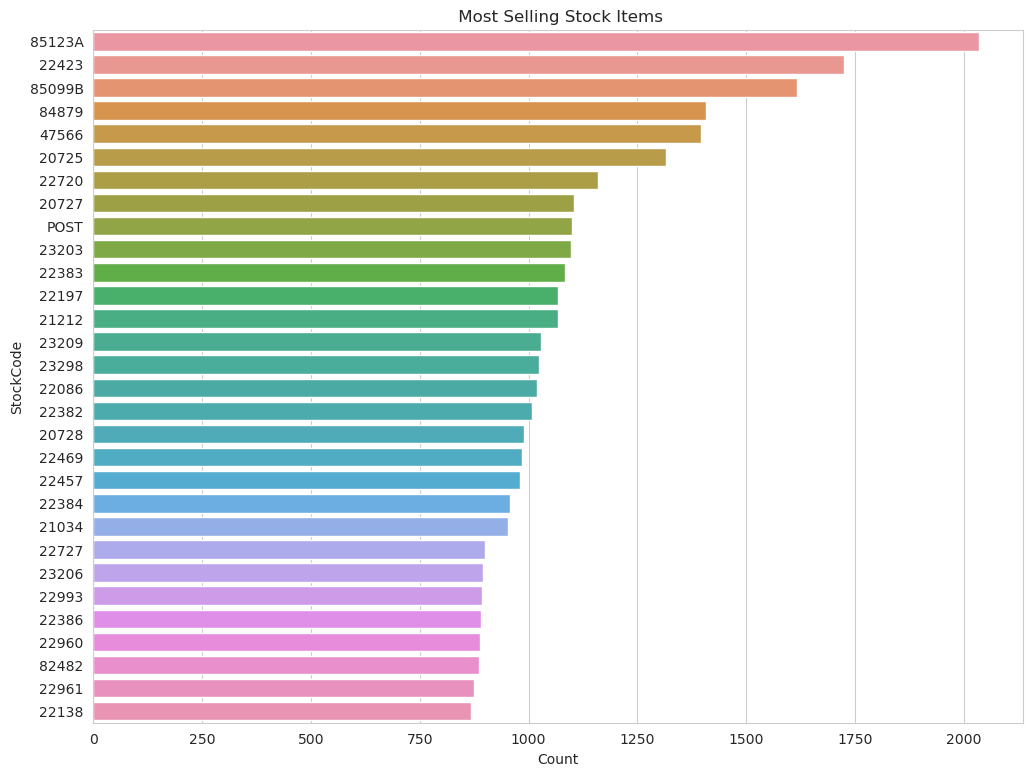

In [44]:
stock = df.groupby('StockCode').size().reset_index(name='Count').sort_values(by='Count',ascending=False).head(30)
plt.figure(figsize=(12, 9))
sns.barplot(y = stock['StockCode'],x = stock['Count'])
plt.xlabel('Count')
plt.title(' Most Selling Stock Items')
plt.show()

#### We see that Most Selling 
- Stock is 85123A Item Description - whit hanging heart t-light holder ; 
- Stock is 22423  Item Description - regency cake stand 3-tier
- and so on.

## Discover patterns For Unit Price

In [45]:
df.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

We see that there are unit price = 0 (FREE items)

There are some free items given to customers from time to time.

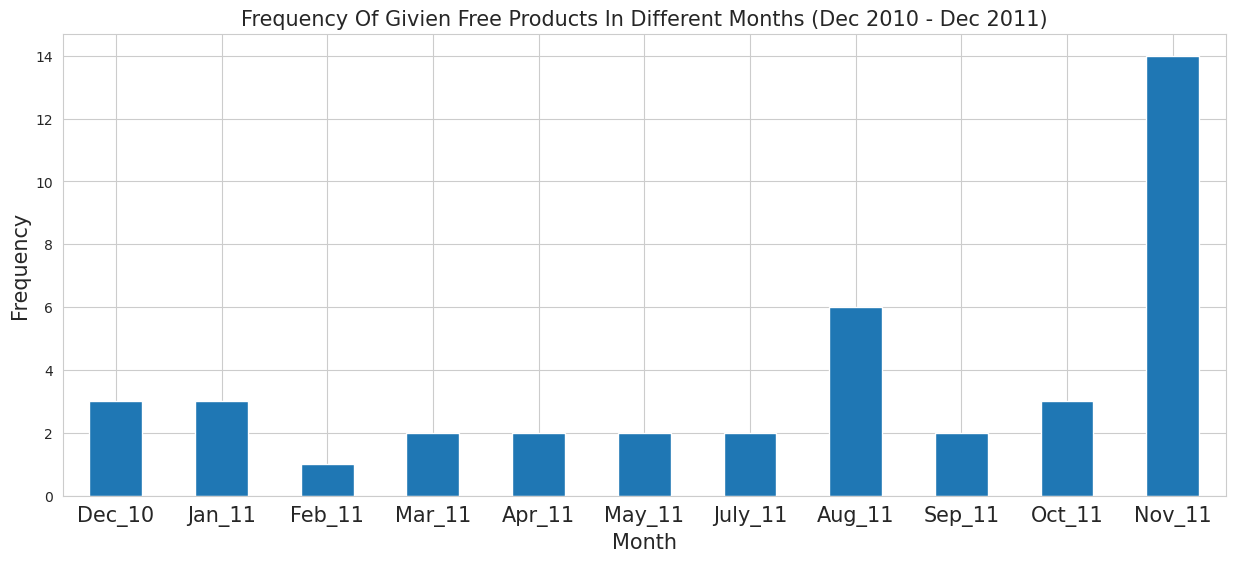

In [46]:
ax = df[df.UnitPrice ==0].YearMonth.value_counts().sort_index().plot(kind='bar', figsize=(15, 6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_title('Frequency Of Givien Free Products In Different Months (Dec 2010 - Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11', 'Apr_11', 'May_11', 'July_11', 'Aug_11', 'Sep_11', 'Oct_11', 'Nov_11'), rotation='horizontal', fontsize=15)
plt.show()

Not clear why there are FREE items given to certain customers

On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011) and Maximum free gift was given in November 2011 .It seems Like Special Offers given on festival .


### Remove These Free Products From Dataset.

In [47]:
df= df[df.UnitPrice !=0]

## Removal Of Outliers

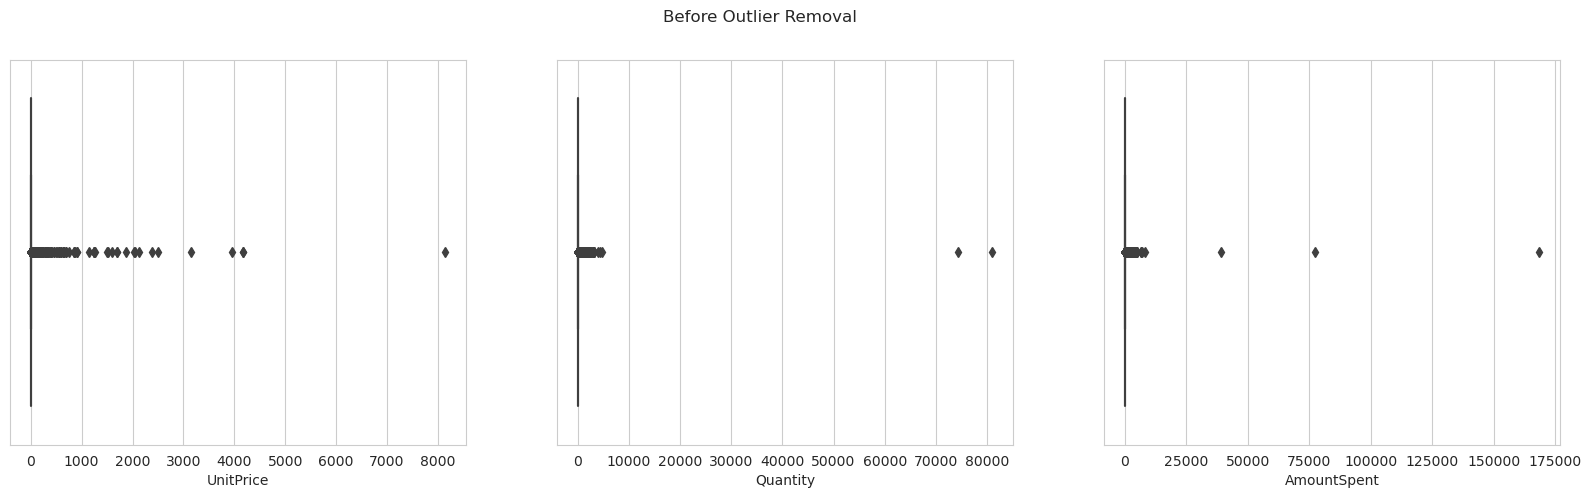

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
column = ['UnitPrice','Quantity','AmountSpent']

plt.suptitle("Before Outlier Removal");
for a, col in zip(ax, column) : 
    sns.boxplot(data =df, x = col,  ax = a)
    

### Removing Extreme Values 

In [49]:
df = df[(df['UnitPrice']<6000) & (df['Quantity']<10000) & (df['AmountSpent']<25000)]

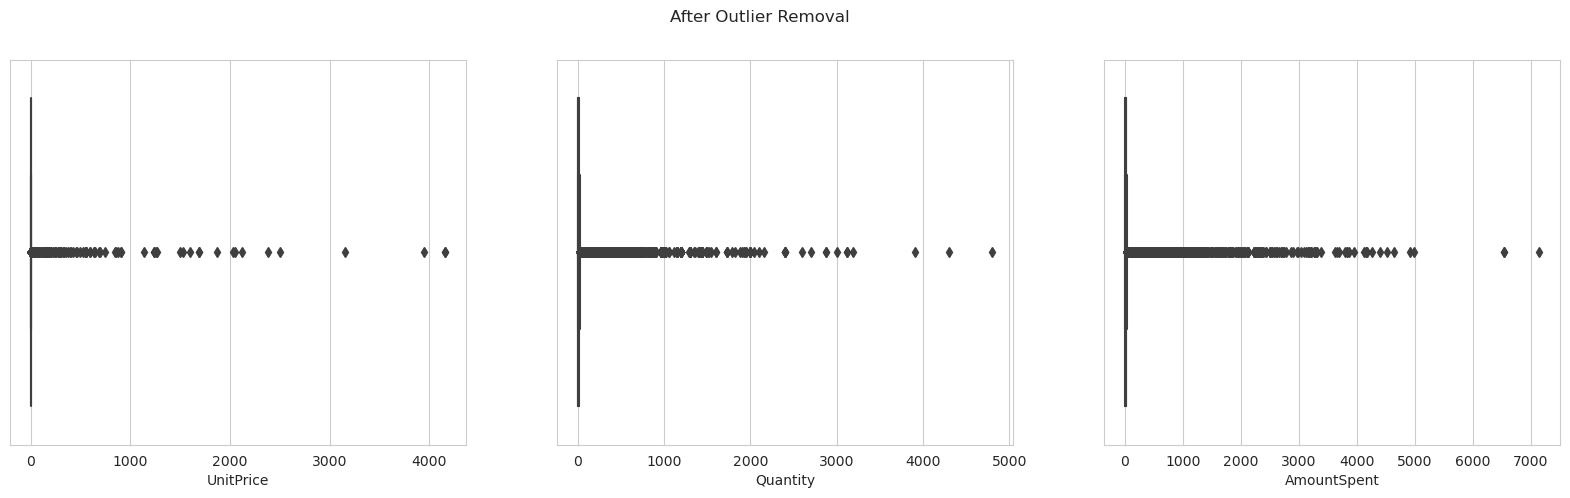

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))
column = ['UnitPrice','Quantity','AmountSpent']
plt.suptitle("After Outlier Removal");
for a, col in zip(ax, column) : 
    sns.boxplot(data =df, x = col,  ax = a)
    

<a id="4"></a> <br>
# Step 4 : Feature Engineering and RFM Analysis
<br>

### Compute The Last Transaction Date

In [51]:
last_date = max(df['InvoiceDate'])
print("last_date ",last_date)

#Take one day extra so than when we calculate last purchace we can't get zero for order placed on last day so that when we take the log 0 = infinity is not the problem
max_date = last_date + pd.DateOffset(1)
print("max_date ",max_date)

last_date  2011-12-09 12:50:00
max_date  2011-12-10 12:50:00


### Compute The Difference Between Max Date and Transaction Date

In [52]:
df['Diff'] = (max_date - df['InvoiceDate']).dt.days

In [53]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,YearMonth,Day,Hour,StockCode,Description,Quantity,UnitPrice,AmountSpent,Country,Diff
0,17850,536365,2010-12-01 08:26:00,201012,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,United Kingdom,374
1,17850,536365,2010-12-01 08:26:00,201012,3,8,71053,white metal lantern,6,3.39,20.34,United Kingdom,374
2,17850,536365,2010-12-01 08:26:00,201012,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,United Kingdom,374
3,17850,536365,2010-12-01 08:26:00,201012,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,United Kingdom,374
4,17850,536365,2010-12-01 08:26:00,201012,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,United Kingdom,374


## Performing RFM analysis
<br>

__1. Recency:__ How recently a customer has made a purchase.
- The more recently a customer had made a purchase the more likely they will continue to keep business and brand in mind.

- Such information can be used to get recent customers to visit the business and spend more. And efforts can be made to remind customers who are inactive to visit the website and make a transaction.
    


__2. Monetary value:__ How much money a customer spends on purchases.
- Monetary value stems from how much the customer spends. A natural inclination is to put more emphasis on encouraging customers who spend the most money to continue to do so.

- While this can produce a better return on investment (ROI) in marketing and customer service, it also runs the risk of alienating customers who have been consistent but may not spend as much with each transaction.


__3. Frequency:__ How often a customer makes a purchase.
- The frequency of a customer’s transactions may be affected by factors such as the type of product, the price point for the purchase, and the need for replenishment orreplacement.

- If the purchase cycle can be predicted—for example, when a customer needs to buy more groceries—marketing efforts may be directed toward reminding them to visit the business when staple items run low.
    
    
This analysis will help us in segmenting customers into different homogenous groups so that we can engage with each group with different targeted manner.

<br>

## New Attributes :  Recency, Frequency, Monetary Of Customers

In [54]:
# New Attribute : Recency
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency.columns = ['CustomerID', 'Recency']

# New Attribute : Monetary
monetary = df.groupby('CustomerID')['AmountSpent'].sum()
monetary = monetary.reset_index()
monetary.columns = ['CustomerID', 'Monetary']

# New Attribute : Frequency
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']

## Combine All Three Recency, Frequency, Monetory In One

In [55]:
rmf = pd.concat([recency, monetary,frequency], axis = 1)
rmf = rmf.iloc[:,[0,1,3,5]]
rmf = rmf.set_index('CustomerID')

In [56]:
rmf.head()

,Recency,Monetary,Frequency
CustomerID,,,
12347,2,4310.00,182
12348,75,1797.24,31
12349,19,1757.55,73
12350,310,334.40,17
12352,36,2506.04,85


## ADD Quartile Atrribues : We Add Three Attributes Recency, Frequency and Monetary Quartile

A quartile is a type of quantile.

Quantiles are values that split sorted data or a probability distribution into equal parts. In general terms, a q-quantile divides sorted data into q parts. The most commonly used quantiles have special names:

- Quartiles (4-quantiles): Three quartiles split the data into four parts.
- Deciles (10-quantiles): Nine deciles split the data into 10 parts.
- Percentiles (100-quantiles): 99 percentiles split the data into 100 parts.

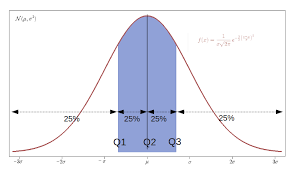

__Example :__  we have divide our data like we have list of numbers 1 to 100. the we divide it into 5 quanitile i.e. 1 to 20, 21 to 40,41 to 60 and soon. They Become parts of the List And we Categories them as 1,2,3,4,5 repectively.Then,
- the value 49 will belong to category 3.
- Similary, the value 17 will belong to category 1.

We use qcut to Find the Quartiles.

In [57]:
# lower the recency is better
# 1 is the worst and 5 is the best 
rmf['RecencyQuartile'] = pd.qcut(rmf['Recency'],5,labels=[5,4,3,2,1]) # using qcut to make quartiles 

# higher the money the better 
rmf['MonetaryQuartile'] = pd.qcut(rmf['Monetary'],5,labels=[1,2,3,4,5])

# higher the frequenct the better 
rmf['FrequencyQuartile'] = pd.qcut(rmf['Frequency'].rank(method = "first"),5,labels=[1,2,3,4,5])

## Create a new column 'RMFSegment' by concatenating the quartile values of recency, frequency and monetary variables as strings

In [58]:
rmf['RMFSegment'] = rmf['RecencyQuartile'].astype(str) + rmf['MonetaryQuartile'].astype(str) + rmf['FrequencyQuartile'].astype(str)

## Create a new column 'RMFScore' by adding up the quartile values of recency, frequency and monetary variables as integers

In [59]:
rmf['RMFScore'] = rmf[['RecencyQuartile','MonetaryQuartile', 'FrequencyQuartile']].sum(axis = 1)

In [60]:
#Showing  the RFM  Dataframe
rmf

,Recency,Monetary,Frequency,RecencyQuartile,MonetaryQuartile,FrequencyQuartile,RMFSegment,RMFScore
CustomerID,,,,,,,,
12347,2,4310.00,182,5,5,5,555,15
12348,75,1797.24,31,2,4,3,243,9
12349,19,1757.55,73,4,4,4,444,12
12350,310,334.40,17,1,2,2,122,5
12352,36,2506.04,85,3,5,4,354,12
...,...,...,...,...,...,...,...,...
18280,278,180.60,10,1,1,1,111,3
18281,181,80.82,7,1,1,1,111,3
18282,8,178.05,12,5,1,1,511,7


### Checking Outliers In RMF

Text(0.5, 0, 'Attributes')

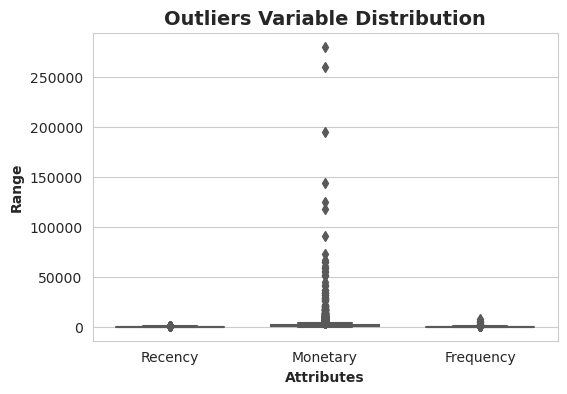

In [61]:
# Outlier Analysis of Monetory Frequency and Recency
attributes = ['Recency', 'Monetary', 'Frequency']
plt.rcParams['figure.figsize'] = [6,4]
sns.boxplot(data = rmf[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

It's really good seems like no outliers in the data.

<a id="5"></a> <br>
# Step 5 : Data Transformation and Correlation Between Features
<br>

#### Here we use Kmeans Clustering Model. But to use this model we have to fix the distribution.To fix the distribution we will first add log transform followed by scaling the data.

#### Copy features which are required to build cluster model in rmf_data dataframe from rmf dataframe to perform Log Transformation and Scaling  

In [62]:
rmf_data = rmf.iloc[:,:3].copy()

In [63]:
rmf_data.head()

,Recency,Monetary,Frequency
CustomerID,,,
12347,2,4310.00,182
12348,75,1797.24,31
12349,19,1757.55,73
12350,310,334.40,17
12352,36,2506.04,85



- __Log Tranformation :__ Log transformation is a data transformation method that replaces each variable x with a log(x). It is often used to make highly skewed distributions less skewed, which can improve the interpretability and validity of statistical analysis.

### Plot the Distribution Before Log Transformation

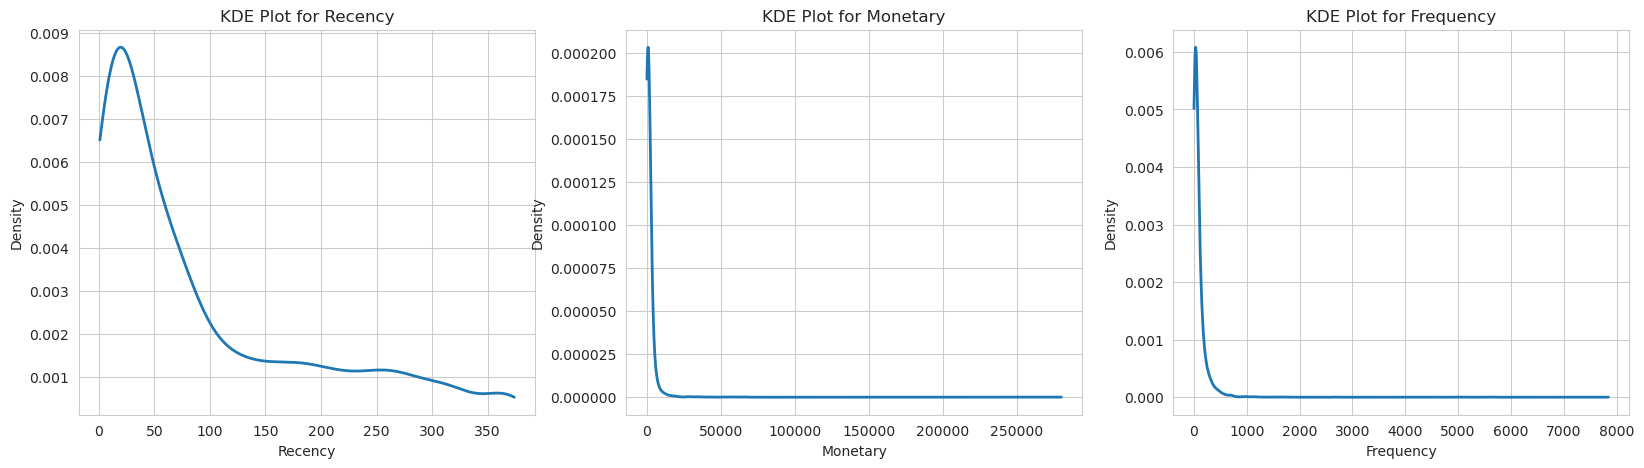

In [64]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))


for idx, col in zip([0,1,2],rmf_data.columns):
    data = rmf_data[col]
    kde = gaussian_kde(data)
    x_values = np.linspace(data.min(), data.max(), 1000)
    kde_values = kde(x_values)
    
    ax[idx].plot(x_values, kde_values, linewidth=2)
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Density')
    ax[idx].set_title(f'KDE Plot for {col}')

plt.show()


### Log Transformation

In [65]:
rmf_data = np.log(rmf_data)

In [66]:
rmf_data.head()

,Recency,Monetary,Frequency
CustomerID,,,
12347,0.693147,8.368693,5.204007
12348,4.317488,7.494007,3.433987
12349,2.944439,7.471676,4.290459
12350,5.736572,5.812338,2.833213
12352,3.583519,7.826459,4.442651


### Plot the Distribution After Log Transformation

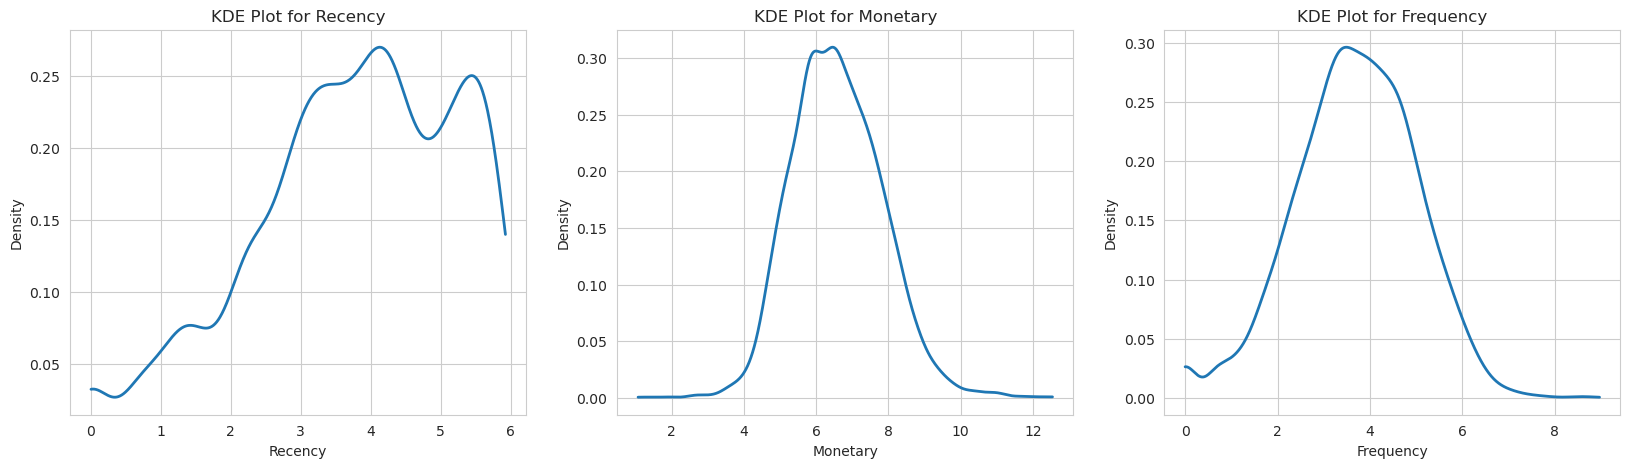

In [67]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

for idx, col in zip([0,1,2],rmf_data.columns):
    data = rmf_data[col]
    kde = gaussian_kde(data)
    x_values = np.linspace(data.min(), data.max(), 1000)
    kde_values = kde(x_values)
    
    ax[idx].plot(x_values, kde_values, linewidth=2)
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Density')
    ax[idx].set_title(f'KDE Plot for {col}')

plt.show()

- __Scaling :__ Scaling is used in k-means clustering because k-means algorithm is sensitive to the scale of the data and the initial cluster centers. If the data features have different scales, they will contribute unequally to the distance measure and the resulting clusters. StandardScaler helps to make the data scale-free and improve the clustering performance.

In [68]:
#create an instance of StandardScaler
sc = StandardScaler()

#fit and transform the data frame with only the first three columns (Recency, Monetary, Frequency)
rmf_scaled = sc.fit_transform(rmf_data)

#convert the scaled array into a data frame with the same column names as the original data frame
rmf_scaled = pd.DataFrame(rmf_scaled, columns = rmf_data.columns)

In [69]:
rmf_scaled.head()

,Recency,Monetary,Frequency
0,-2.148697,1.417500,1.149601
1,0.383736,0.721884,-0.185934
2,-0.575653,0.704125,0.460301
3,1.375292,-0.615505,-0.639237
4,-0.129110,0.986275,0.575134


## Correlation Between Recency,Monetory,Frequency

Correlation is a statistical measure that expresses the strength of the relationship between two variables.
 
<br>The value of the correlation coefficient can take any values from -1 to 1.

- If the value is 1, it is said to be a positive correlation between two variables. This means that when one variable increases, the other variable also increases.
- If the value is -1, it is said to be a negative correlation between the two variables. This means that when one variable increases, the other variable decreases.
- If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.


<AxesSubplot:>

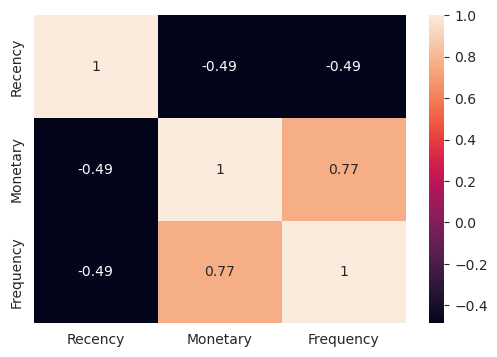

In [70]:
sns.heatmap(data= rmf_scaled.corr(), annot=True)

Hence , we see that there is strong Correlation between them.

<a id="6"></a> <br>
# Step 6 : Model Building
<br>

## K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.<br>

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

## First Finding The Optimal Number Of Clusters

- __Elbow Curve to get the right number of Clusters__
<br>
The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In [71]:
# Elbow-curve/WCSS

WCSS = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(rmf_scaled)
    
    WCSS.append(kmeans.inertia_)


<function matplotlib.pyplot.show(close=None, block=None)>

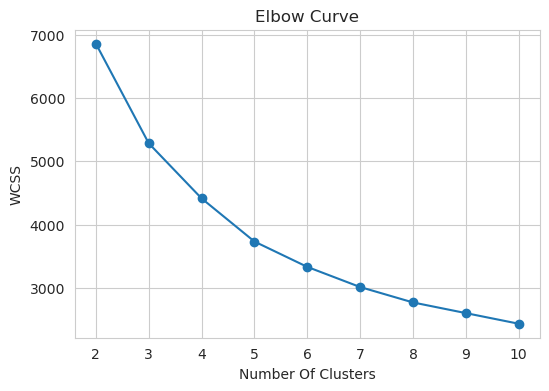

In [72]:
# plot the WCSS for each n_clusters
plt.figure(figsize=(6,4))
plt.plot(WCSS,marker='o')
plt.xticks(range(len(WCSS)), [2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Number Of Clusters')  # Add a label for the x-axis
plt.ylabel('WCSS')  # Add a label for the y-axis
plt.title('Elbow Curve')  # Add a title for the plot
plt.show

- __Using silhouette Analysis__
<br>
The silhouette score is a metric that measures how well a data point fits into its assigned cluster, based on the distance to other points in the same cluster and the nearest neighboring cluster . It ranges from -1 to 1, where a higher value indicates a better fit. The silhouette score can be used to evaluate the quality of k-means clustering and to choose the optimal number of clusters.

The value of k that gives me the highest silhouette score is the best one for the data.

In [73]:
# Create an empty list to store the silhouette scores for different values of k
scores = [] 
# Iterate over a range of values for k, from 2 to 10
for k in range(2, 11): 
    # Create a KMeans clustering object with k clusters
    kmeans = KMeans(n_clusters=k,random_state = 42) 
    # Fit the KMeans object to the scaled data
    kmeans.fit(rmf_scaled)
    
    # Get the cluster labels for each data point
    labels = kmeans.labels_ 
   
    # Calculate the silhouette score for the clustering with k clusters
    score = silhouette_score(rmf_scaled, labels, metric="euclidean")
    # Add the silhouette score to the list of scores
    scores.append(score)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, score))

For n_clusters=2, the silhouette score is 0.39578545450801705
For n_clusters=3, the silhouette score is 0.3038858378357374
For n_clusters=4, the silhouette score is 0.30305863612454376
For n_clusters=5, the silhouette score is 0.27855076349505514
For n_clusters=6, the silhouette score is 0.2773462377292151
For n_clusters=7, the silhouette score is 0.26316053785926036
For n_clusters=8, the silhouette score is 0.2627287882331166
For n_clusters=9, the silhouette score is 0.26069362770219334
For n_clusters=10, the silhouette score is 0.25895573050044557


<function matplotlib.pyplot.show(close=None, block=None)>

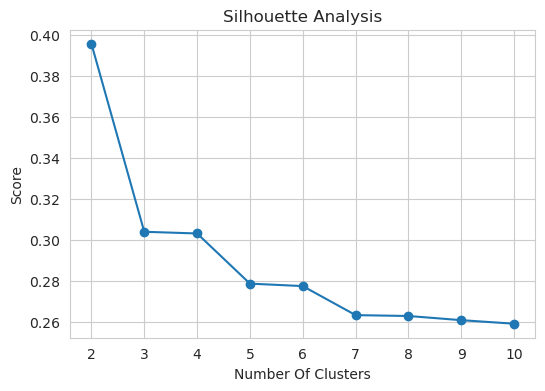

In [74]:
#Plot the Score
plt.figure(figsize=(6,4))
plt.plot(scores,marker='o')
plt.xticks(range(len(scores)), [2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('Number Of Clusters')  # Add a label for the x-axis
plt.ylabel('Score')
plt.title('Silhouette Analysis')  # Add a title for the plot
plt.show

#### The Silhouette Score reaches its global maximum at the optimal k. From Both above curves analysis the optimal value of k=4.

## Final Cluster Model

In [75]:
# Set the number of clusters to 4
k = 4

# Create a KMeans object with k clusters and a random state of 42
kmeans = KMeans(n_clusters=k, random_state=42) 

# Fit the KMeans object to the scaled rmf data
kmeans.fit(rmf_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column to the rmf_data dataframe
rmf_data['Cluster'] = labels

# Add the cluster labels as a new column to the original rmf dataframe
rmf['Cluster'] = labels

In [76]:
rmf_data.head()

,Recency,Monetary,Frequency,Cluster
CustomerID,,,,
12347,0.693147,8.368693,5.204007,1
12348,4.317488,7.494007,3.433987,3
12349,2.944439,7.471676,4.290459,3
12350,5.736572,5.812338,2.833213,0
12352,3.583519,7.826459,4.442651,3


In [77]:
rmf.head()

,Recency,Monetary,Frequency,RecencyQuartile,MonetaryQuartile,FrequencyQuartile,RMFSegment,RMFScore,Cluster
CustomerID,,,,,,,,,
12347,2,4310.00,182,5,5,5,555,15,1
12348,75,1797.24,31,2,4,3,243,9,3
12349,19,1757.55,73,4,4,4,444,12,3
12350,310,334.40,17,1,2,2,122,5,0
12352,36,2506.04,85,3,5,4,354,12,3


<a id="7"></a> <br>
# Step 7 : Visualize Customer Segementtion
<br>

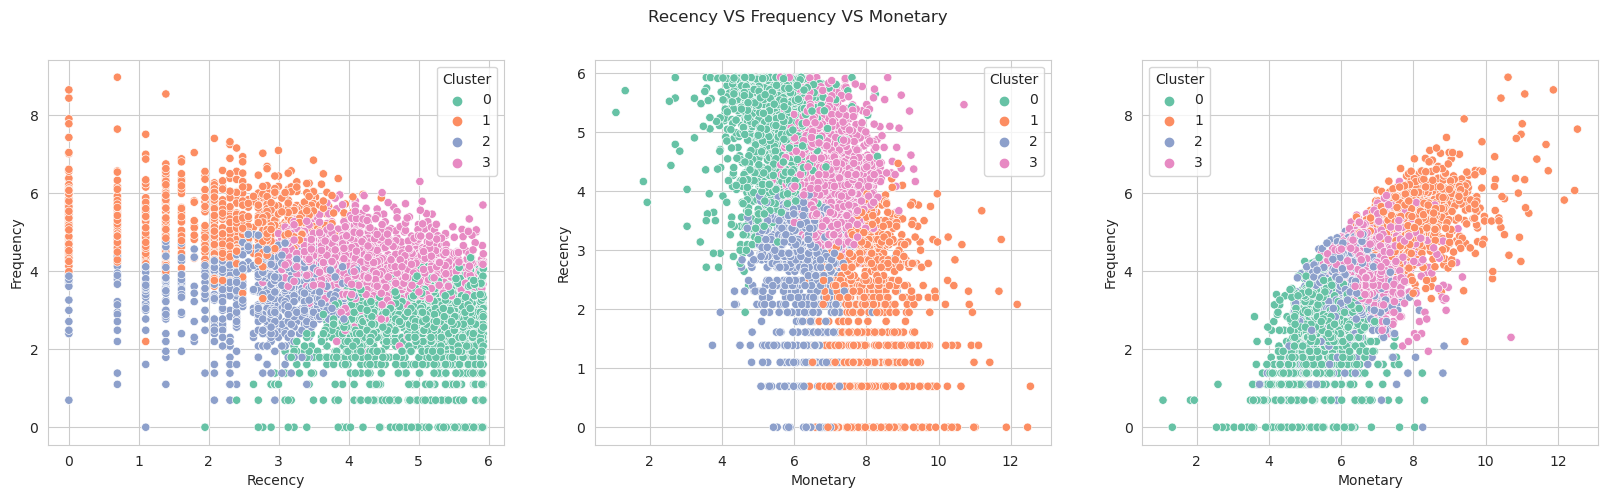

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

plt.suptitle("Recency VS Frequency VS Monetary");

sns.scatterplot(x = rmf_data['Recency'], y = rmf_data['Frequency'], hue = rmf_data['Cluster'], palette='Set2',ax=ax[0]);
sns.scatterplot(x = rmf_data['Monetary'], y = rmf_data['Recency'], hue = rmf_data['Cluster'], palette="Set2",ax=ax[1]);
sns.scatterplot(x = rmf_data['Monetary'], y = rmf_data['Frequency'], hue = rmf_data['Cluster'], palette="Set2",ax=ax[2]);

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

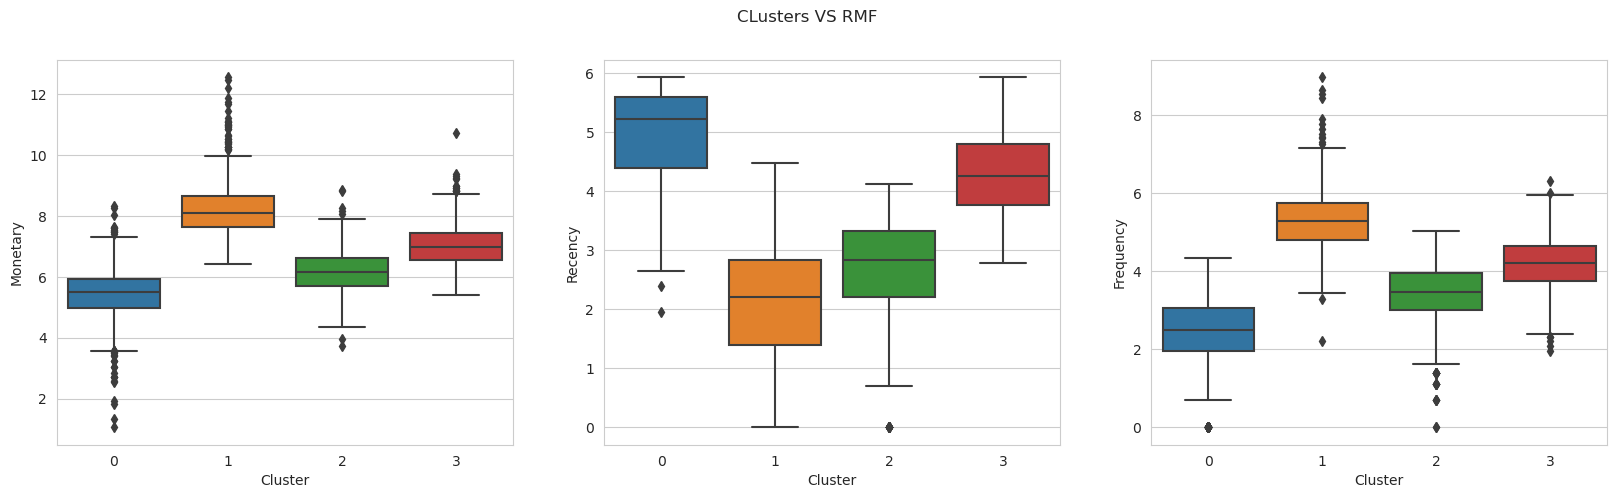

In [79]:
# Box plot to visualize Clusters
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

plt.suptitle("CLusters VS RMF")

sns.boxplot(x='Cluster', y='Monetary', data=rmf_data,ax=ax[0])
sns.boxplot(x='Cluster', y='Recency', data=rmf_data,ax=ax[1])
sns.boxplot(x='Cluster', y='Frequency', data=rmf_data, ax=ax[2])

<a id="8"></a> <br>
# Step 8 : Final Analysis
<br>

### Group rmf Dataframe By Clusters

In [80]:
rmf.groupby("Cluster").agg({"Recency":"mean", "Monetary":"mean","Frequency":"mean"})

,Recency,Monetary,Frequency
Cluster,,,
0,183.970972,297.008005,14.754717
1,12.163095,6983.966214,286.234524
2,19.422466,594.893407,38.339438
3,93.589231,1427.396618,81.316154


## Analysing The Clusters


- Cluster 1 - are best customers with low recency high monetary and high frequency - Platinum Customers
- Cluster 3 - represents customer with relative low Recency High Monetary and Somewhat high frequency - Gold Customers
- Cluster 2 - Silver Customers
- Cluster 0 - Bronze Customer

## RMF Score Analysis

| Segment | Scores |
|----------------------|----------------------------------------------------------------------------------------------------------|
| Champions| 555, 554, 544, 545, 454, 455, 445 |
|----------------------|----------------------------------------------------------------------------------------------------------|
|Loyal     |543, 444, 435, 355, 354, 345, 344, 335|
|----------------------|----------------------------------------------------------------------------------------------------------|
|Potential Loyalists | 553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352 351, 342, 341, 333, 323|
|----------------------|----------------------------------------------------------------------------------------------------------|
|New Customers | 512, 511, 422, 421 412, 411, 311
|----------------------|----------------------------------------------------------------------------------------------------------|
|Promising | 525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313
|----------------------|----------------------------------------------------------------------------------------------------------|
|Need Attention | 535, 534, 443, 434, 343, 334, 325, 324|
|----------------------|----------------------------------------------------------------------------------------------------------|
|About To Sleep | 331, 321, 312, 221, 213, 231, 241, 251|
|----------------------|----------------------------------------------------------------------------------------------------------|
| At Risk | 255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124 |
|----------------------|----------------------------------------------------------------------------------------------------------|
|Cannot Lose Them | 155, 154, 144, 214,215,115, 114, 113 |
|----------------------|----------------------------------------------------------------------------------------------------------|
|Hibernating customers | 332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211 |
|----------------------|----------------------------------------------------------------------------------------------------------|
|Lost customers | 111, 112, 121, 131,141,151 |
|----------------------|----------------------------------------------------------------------------------------------------------|

<ul>
<li><strong>Champions</strong>: These are customers who have purchased very recently, have very high frequency and very high monetary value. They are likely to be the best customers who are loyal, engaged, and profitable. They need referral programs, co-creation opportunities, and community building to leverage their advocacy and influence.</li>
<li><strong>Loyal customers</strong>: These are customers who have purchased recently, have high frequency and high monetary value. They are likely to be loyal and satisfied customers who generate consistent revenue and referrals. They need appreciation and recognition campaigns, loyalty rewards, and exclusive offers to maintain their loyalty and advocacy.</li>
<li><strong>Potential loyalists</strong>: These are customers who have purchased recently, have high frequency and low monetary value. They are likely to be frequent but low-spending customers who have the potential to become loyal and valuable customers. They need upselling and cross-selling campaigns, free trials, and discounts to increase their spending and loyalty.</li>
<li><strong>New customers</strong>: These are customers who have purchased very recently, have very low frequency and low monetary value. They are likely to be first-time buyers who have not yet developed a relationship with the brand. They need thank you campaigns, follow-up messages, and social proof to increase their retention and satisfaction.</li>
<li><strong>Promising</strong>: These are customers who have purchased recently, have low frequency and low monetary value. They are likely to be new or recent customers who have not yet established a purchase pattern or preference. They need welcome campaigns, onboarding programs, and product education to increase their awareness and trust in the brand.</li>
<li><strong>Need attention</strong>: These are customers who have purchased recently, have average frequency and average monetary value. They are likely to be potential loyal customers who need some attention and encouragement to increase their engagement and spending. They need cross-selling and upselling campaigns, loyalty programs, and product reviews to motivate them to buy more frequently and spend more.</li>
<li><strong>About to sleep</strong>: These are customers who have not purchased recently, have low frequency and low monetary value. They are likely to be occasional customers who are becoming inactive or indifferent. They need re-engagement campaigns, feedback surveys, and product recommendations to revive their interest and loyalty.</li>
<li><strong>At risk</strong>: These are customers who have not purchased recently, but have high frequency and high monetary value. They are likely to be loyal customers who are losing interest or switching to competitors. They need attention and retention campaigns to remind them of the value proposition and benefits of the brand.</li>
<li><strong>Can’t lose them</strong>: These are customers who have not purchased recently, have high frequency and very high monetary value. They are likely to be the most valuable customers who are at risk of churning. They need personalized and exclusive offers, loyalty programs, and VIP treatment to retain them and increase their satisfaction.</li>
<li><strong>Hibernating</strong>: These are customers who have not purchased for a long time, have low frequency and low monetary value. They are likely to be inactive or lost customers who need reactivation campaigns or special offers to win them back.</li>
</ul>

### Map RMF segments and Clusters with Listed labels below

In [81]:
# Using regex on RMF Column

segmentation_map = {
    r'5[4-5]': 'champions',
    r'[3-4][4-5]': 'loyal_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'51': 'new_customers',
    r'4[1-2]': 'promising',
    r'[3-5]3': 'need_attention',
    r'3[1-2]': 'about_to_sleep',
    r'[1-2][3-5]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'[1-2][1-2]': 'hibernating',  
    
}

cluster_map = {
    1: "Platinum", 
    3: "Gold",
    2: "Silver",
    0: "Bronze"
}

## Add Column Segments and ClusterSegments in rmf Dataframe

In [82]:
rmf['Segments'] = rmf['RMFSegment'].str[:2].replace(segmentation_map, regex=True)

In [83]:
# Assign cluster segments to the rmf dataframe based on the Clusters column and the cluster_map dictionary
rmf['ClusterSegments'] = rmf['Cluster'].replace(cluster_map)

In [84]:
rmf.head()

,Recency,Monetary,Frequency,RecencyQuartile,MonetaryQuartile,FrequencyQuartile,RMFSegment,RMFScore,Cluster,Segments,ClusterSegments
CustomerID,,,,,,,,,,,
12347,2,4310.00,182,5,5,5,555,15,1,champions,Platinum
12348,75,1797.24,31,2,4,3,243,9,3,at_Risk,Gold
12349,19,1757.55,73,4,4,4,444,12,3,loyal_customers,Gold
12350,310,334.40,17,1,2,2,122,5,0,hibernating,Bronze
12352,36,2506.04,85,3,5,4,354,12,3,loyal_customers,Gold


## RelationShip Between Segments and Cluster Segments

<p>I feel like there is a relationship between the derived Segments and ClusterSegments instead of doing manual analysis I am using chi-square test to check for the relationship if there 
is a significant relationship we do not need to analyse the clusters seprately. </p>
<p>Null Hypothesis (H0): There is no substantial relationship between the two variables (in case of independence test), or there is no difference in variable distribution (in case of goodness of fit). </p>
<p>Alternative Hypothesis (H1): There is a substantial relationship between variables (in case of independence test) or a significant variation in variable distribution (in case of goodness of fit).</p>

In [85]:
relation_table = pd.crosstab(rmf['Segments'],rmf['ClusterSegments'])

In [86]:
chi2_stat, p, dof, expected = chi2_contingency(relation_table)

In [87]:
p # p is less than 0.05 there is a substantial relationship between variables 

0.0

In [88]:
chi2_stat

7418.679081686947

### Hence we see that by Chi-square test that there is a strong relation between them. We can also see that by showing relation table

In [89]:
relation_table

ClusterSegments,Bronze,Gold,Platinum,Silver
Segments,,,,
about_to_sleep,215,32,0,87
at_Risk,145,549,1,0
champions,0,0,536,79
hibernating,948,65,0,0
loyal_customers,0,455,281,51
need_attention,18,147,0,34
new_customers,3,0,0,57
potential_loyalists,7,52,22,442
promising,42,0,0,69


<a id="9"></a> <br>
# Step 9 : Save our Final Analysis dataframe as a csv file
<br>

In [90]:
#Resulting DataFrame
rmf.head(20)

,Recency,Monetary,Frequency,RecencyQuartile,MonetaryQuartile,FrequencyQuartile,RMFSegment,RMFScore,Cluster,Segments,ClusterSegments
CustomerID,,,,,,,,,,,
12347,2,4310.00,182,5,5,5,555,15,1,champions,Platinum
12348,75,1797.24,31,2,4,3,243,9,3,at_Risk,Gold
12349,19,1757.55,73,4,4,4,444,12,3,loyal_customers,Gold
12350,310,334.40,17,1,2,2,122,5,0,hibernating,Bronze
12352,36,2506.04,85,3,5,4,354,12,3,loyal_customers,Gold
12353,204,89.00,4,1,1,1,111,3,0,hibernating,Bronze
12354,232,1079.40,58,1,4,3,143,8,3,at_Risk,Gold
12355,214,459.40,13,1,2,1,121,4,0,hibernating,Bronze
12356,23,2811.43,59,4,5,4,454,13,3,loyal_customers,Gold


In [91]:
#Save as csv File

rmf.to_csv("Final_Analysis.csv")